In [2]:
import os
import sys

XMem_path = os.path.abspath('../')
sys.path.append(XMem_path)

In [3]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import torch

from inference.data.mask_mapper import MaskMapper
from inference.data.video_reader import VideoReader

In [158]:
data_path = Path('/Users/syedal/plaksha/SurgicalAI/data/endovis/endo17/data')

patient_id = "09"
frames_path = data_path / f'frames/test/instrument_dataset_{patient_id}'
masks_path = data_path / f'masks/test/type_masks/instrument_dataset_{patient_id}'
vid_reader = VideoReader(frames_path, frames_path, masks_path, size=384, use_all_mask=True)

In [159]:
mapper = MaskMapper()

In [160]:
vid_reader[0]['info']

{'frame': 'frame000.png',
 'save': True,
 'idx': 0,
 'shape': (1024, 1280),
 'need_resize': True}

In [162]:
idx = 0
rgb, mask = vid_reader[idx]['rgb'], vid_reader[idx]['mask']
print(rgb.shape, mask.shape)

torch.Size([3, 384, 480]) (1024, 1280)


Unique values in mask: [0 1 2 6]


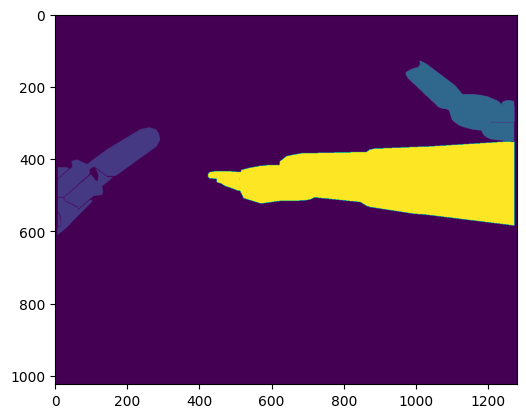

In [163]:
print("Unique values in mask:", np.unique(mask))
plt.imshow(mask);plt.show()


In [8]:
mask, labels = mapper.convert_mask(mask)
print("Labels:", labels)

Labels: [1, 2]


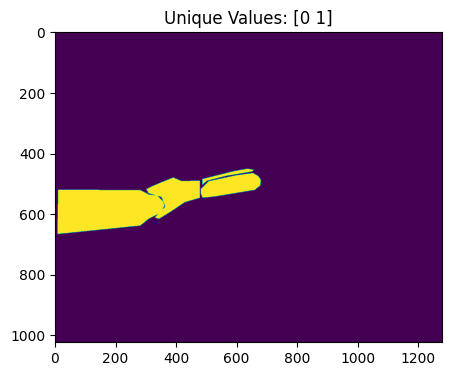

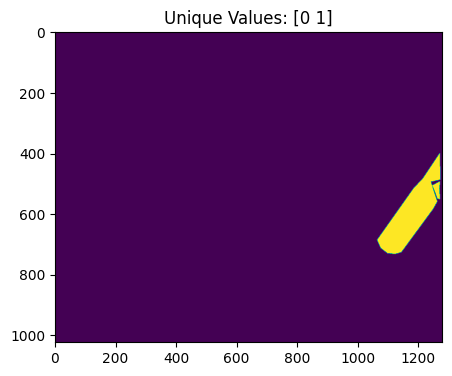

In [9]:
for m in mask:
    unique_values = np.unique(m)
    plt.figure(figsize=(5, 5))
    plt.imshow(m.numpy())
    plt.title(f"Unique Values: {unique_values}")
    plt.show()


In [128]:
from collections import defaultdict
from tqdm import tqdm

data_path = Path('/Users/syedal/plaksha/SurgicalAI/data/endovis/endo17/data')


overall_classes_count = defaultdict(int)

for i in range(1, 9):
    patient_id = f"{i:02d}"
    frames_path = data_path / f'frames/train/instrument_dataset_{patient_id}'
    masks_path = data_path / f'masks/train/type_masks/instrument_dataset_{patient_id}'
    vid_reader = VideoReader(frames_path, frames_path, masks_path, size=-1, use_all_mask=True)
    classes_count = defaultdict(int)
    for img in tqdm(vid_reader):
        msk = img['mask']
        unique_classes = np.unique(msk).tolist()
        unique_classes = [c for c in unique_classes if c != 0]
        for class_id in unique_classes:
            classes_count[class_id] += 1
    print(f"Patient {patient_id} classes count: {classes_count}")
    for class_id, count in classes_count.items():
        overall_classes_count[class_id] += count

print(overall_classes_count)

  0%|          | 0/225 [00:00<?, ?it/s]

100%|██████████| 225/225 [00:20<00:00, 10.92it/s]


Patient 01 classes count: defaultdict(<class 'int'>, {1: 75, 2: 219})


100%|██████████| 225/225 [00:20<00:00, 10.94it/s]


Patient 02 classes count: defaultdict(<class 'int'>, {2: 225})


100%|██████████| 225/225 [00:20<00:00, 10.93it/s]


Patient 03 classes count: defaultdict(<class 'int'>, {3: 225})


100%|██████████| 225/225 [00:21<00:00, 10.27it/s]


Patient 04 classes count: defaultdict(<class 'int'>, {2: 91, 3: 225})


100%|██████████| 225/225 [00:21<00:00, 10.51it/s]


Patient 05 classes count: defaultdict(<class 'int'>, {1: 182, 4: 210, 5: 53})


100%|██████████| 225/225 [00:20<00:00, 10.97it/s]


Patient 06 classes count: defaultdict(<class 'int'>, {3: 222, 6: 126, 2: 210})


100%|██████████| 225/225 [00:19<00:00, 11.35it/s]


Patient 07 classes count: defaultdict(<class 'int'>, {1: 198, 4: 174})


100%|██████████| 225/225 [00:20<00:00, 11.03it/s]

Patient 08 classes count: defaultdict(<class 'int'>, {1: 200, 5: 175, 6: 225})
defaultdict(<class 'int'>, {1: 655, 2: 745, 3: 672, 4: 384, 5: 228, 6: 351})


In [129]:
from collections import defaultdict
from tqdm import tqdm

data_path = Path('/Users/syedal/plaksha/SurgicalAI/data/endovis/endo17/data')


overall_classes_count = defaultdict(int)

for i in range(1, 11):
    patient_id = f"{i:02d}"
    frames_path = data_path / f'frames/test/instrument_dataset_{patient_id}'
    masks_path = data_path / f'masks/test/type_masks/instrument_dataset_{patient_id}'
    vid_reader = VideoReader(frames_path, frames_path, masks_path, size=-1, use_all_mask=True)
    classes_count = defaultdict(int)
    for img in tqdm(vid_reader):
        msk = img['mask']
        unique_classes = np.unique(msk).tolist()
        unique_classes = [c for c in unique_classes if c != 0]
        for class_id in unique_classes:
            classes_count[class_id] += 1
    print(f"Patient {patient_id} classes count: {classes_count}")
    for class_id, count in classes_count.items():
        overall_classes_count[class_id] += count

print(overall_classes_count)

100%|██████████| 75/75 [00:06<00:00, 10.93it/s]


Patient 01 classes count: defaultdict(<class 'int'>, {1: 75, 2: 64})


100%|██████████| 75/75 [00:07<00:00, 10.42it/s]


Patient 02 classes count: defaultdict(<class 'int'>, {2: 75})


100%|██████████| 75/75 [00:06<00:00, 10.98it/s]


Patient 03 classes count: defaultdict(<class 'int'>, {3: 75})


100%|██████████| 75/75 [00:06<00:00, 10.92it/s]


Patient 04 classes count: defaultdict(<class 'int'>, {2: 75, 3: 75})


100%|██████████| 75/75 [00:06<00:00, 10.87it/s]


Patient 05 classes count: defaultdict(<class 'int'>, {1: 65, 4: 61})


100%|██████████| 75/75 [00:06<00:00, 10.97it/s]


Patient 06 classes count: defaultdict(<class 'int'>, {2: 63, 3: 75})


100%|██████████| 75/75 [00:06<00:00, 11.95it/s]


Patient 07 classes count: defaultdict(<class 'int'>, {1: 75, 4: 54, 5: 2})


100%|██████████| 75/75 [00:06<00:00, 11.09it/s]


Patient 08 classes count: defaultdict(<class 'int'>, {1: 75, 6: 75})


100%|██████████| 300/300 [00:28<00:00, 10.43it/s]


Patient 09 classes count: defaultdict(<class 'int'>, {1: 251, 2: 253, 6: 295})


100%|██████████| 300/300 [00:28<00:00, 10.47it/s]

Patient 10 classes count: defaultdict(<class 'int'>, {3: 300})
defaultdict(<class 'int'>, {1: 541, 2: 530, 3: 525, 4: 115, 5: 2, 6: 370})
